結果の可視化

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from collections import Counter

In [115]:
basepath = '/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output'
df_time = pd.read_csv(os.path.join(basepath, '0411time_inference_result_crossmodalatt11.csv'), index_col=0)
df_act = pd.read_csv(os.path.join(basepath, '0411act_inference_result_crossmodalatt11.csv'), index_col=0)
df_loc = pd.read_csv(os.path.join(basepath, '0411loc_inference_result_crossmodalatt11.csv'), index_col=0)
df_indivi = pd.read_csv(os.path.join(basepath, '0411context_inference_result_crossmodalatt11.csv'), index_col=0)

In [116]:
df_time.head()
df_act.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,11,8,0,3,0,10,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1,11,8,0,3,6,10,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2,11,8,0,8,0,10,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,11,8,0,2,10,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,11,8,0,0,10,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [126]:

basepath = '/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output'
df_time = pd.read_csv(os.path.join(basepath, '0411time_inference_result_crossmodalatt11.csv'), index_col=0)
df_act = pd.read_csv(os.path.join(basepath, '0411act_inference_result_crossmodalatt11.csv'), index_col=0)
df_loc = pd.read_csv(os.path.join(basepath, '0411loc_inference_result_crossmodalatt11.csv'), index_col=0)
df_indivi = pd.read_csv(os.path.join(basepath, '0411context_inference_result_crossmodalatt11.csv'), index_col=0)
import matplotlib.pyplot as plt
basepath = '/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output'
df_time = pd.read_csv(os.path.join(basepath, '0411time_teacher_inference_result_crossmodalatt.csv'), index_col=0)
df_act = pd.read_csv(os.path.join(basepath, '0411act_teacher_inference_result_crossmodalatt.csv'), index_col=0)
df_loc = pd.read_csv(os.path.join(basepath, '0411loc_teacher_inference_result_crossmodalatt.csv'), index_col=0)
df_indivi = pd.read_csv(os.path.join(basepath, '0411context_teacher_inference_result_crossmodalatt.csv'), index_col=0)
# act2id = {
#     0: 'W',
#     1: 'S',
#     2: 'B',
#     3: "S2",
#     4: "O",
#     5: "W2",
#     6: "H",
#     7: "?",
#     8: "H"
# }

act2id = {
    0: 'W',
    1: 'O',
    2: 'B',
    3: "B2",
    4: "O2",
    5: "W2",
    6: "H",
    7: "?",
    8: "H"
}

df_act = df_act.applymap(lambda x: act2id.get(int(float(x)), 99) if pd.notna(x) and str(x) != '99.0' else 99)
act_columns = df_act.columns[1:]  # individual_id以外
act_sequences = df_act[act_columns].values

# パターンを抽出（NaNを除去してタプルに）
pattern_list = []
# for row in act_sequences:
#     clean_seq = tuple([int(x) for x in row if not pd.isna(x)])
#     pattern_list.append(clean_seq)


for row in act_sequences:
    clean_seq = tuple(
        str(x) for x in row
        if pd.notna(x) and str(x) != '99'
    )
    pattern_list.append(clean_seq)

# 頻度をカウント
pattern_counts = Counter(pattern_list)

# 結果を表示（出現数が多い順に）
for pattern, count in pattern_counts.most_common():
    print(f"{pattern}: {count}")
print(len(pattern_counts))

print(pattern_counts[('H', 'W')])



/var/folders/_k/qgnv6b3961q5nz5l1v78bw080000gn/T/ipykernel_95054/3694362654.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_act = df_act.applymap(lambda x: act2id.get(int(float(x)), 99) if pd.notna(x) and str(x) != '99.0' else 99)


('W', 'H'): 4718
('O', 'H'): 602
('W', 'O', 'H'): 499
('O2', 'H'): 478
('B', 'H'): 207
('W', 'H', 'O2', 'H'): 175
('W', 'O2', 'H'): 171
('O2', 'O', 'H'): 134
('W2', 'H'): 130
('W', 'W2', 'H'): 123
('W', 'W2', 'W', 'H'): 117
('O', 'O', 'H'): 114
('W', 'O', 'O', 'H'): 77
('W', 'O', 'W', 'H'): 66
('H',): 66
('B2', 'W', 'B2', 'H'): 66
('B2', 'H'): 51
('B2', 'W', 'H'): 50
('W', 'H', 'O', 'H'): 47
('O2', 'H', 'O', 'H'): 44
('W', 'B2', 'H'): 44
('B', 'O', 'H'): 43
('W2', 'W', 'H'): 41
('O2', 'O2', 'H'): 40
('O', 'H', 'O2', 'H'): 35
('O', 'H', 'O', 'H'): 34
('W', 'H', 'W', 'H'): 30
('O2', 'H', 'O2', 'H'): 30
('W', 'O2', 'O', 'H'): 28
('W', 'O', 'W', 'O', 'H'): 28
('O', 'O', 'O', 'H'): 27
('W2', 'O', 'H'): 26
('B2', 'H', 'B2', 'H'): 26
('W', 'W2', 'O', 'H'): 25
('B', 'H', 'O', 'H'): 23
('O', 'O2', 'H'): 22
('W', 'W2', 'W2', 'H'): 21
('O2',): 21
('W2', 'W2', 'H'): 21
('O', 'W', 'H'): 19
('W', 'W2', 'W', 'O', 'H'): 18
('W', 'B', 'H'): 18
('O2', 'O', 'O', 'H'): 18
('O2', 'O2'): 18
('W', 'H', 'B2',

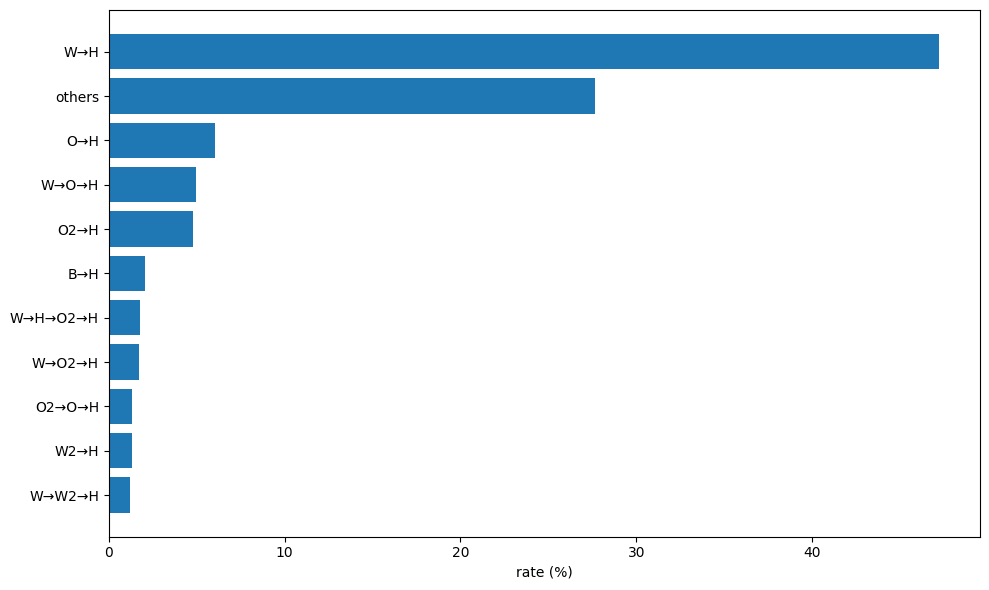

In [128]:
import matplotlib.pyplot as plt
basepath = '/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output'
df_time = pd.read_csv(os.path.join(basepath, '0411time_teacher_inference_result_crossmodalatt.csv'), index_col=0)
df_act = pd.read_csv(os.path.join(basepath, '0411act_teacher_inference_result_crossmodalatt.csv'), index_col=0)
df_loc = pd.read_csv(os.path.join(basepath, '0411loc_teacher_inference_result_crossmodalatt.csv'), index_col=0)
df_indivi = pd.read_csv(os.path.join(basepath, '0411context_teacher_inference_result_crossmodalatt.csv'), index_col=0)

act2id = {
    0: 'W',
    1: 'O',
    2: 'B',
    3: "B2",
    4: "O2",
    5: "W2",
    6: "H",
    7: "?",
    8: "H"
}
# 1. 割合に変換
total = sum(pattern_counts.values())
pattern_freq = {k: v / total * 100 for k, v in pattern_counts.items()}  # %

# 2. 「others」に分類する条件
def is_others(k, v, threshold=10):  # 例：出現が10件未満 or 全Wならothersへ
    return v < threshold or k == tuple(['W'] * len(k))

# 3. フィルタリングして others にまとめる
filtered = {}
others_count = 0

for k, v in pattern_counts.items():
    if is_others(k, v):
        others_count += v
    else:
        filtered[k] = v

# 割合に変換（再計算）
# filtered["others"] = others_count
# カウント
pattern_counts = Counter(pattern_list)

# 上位10を取得、それ以外を others にまとめる
top_n = 10
sorted_patterns = pattern_counts.most_common()
top_patterns = dict(sorted_patterns[:top_n])
others_count = sum(v for _, v in sorted_patterns[top_n:])
top_patterns['others'] = others_count
# 割合に変換
total = sum(top_patterns.values())
pattern_freq_filtered = {k: v / total * 100 for k, v in top_patterns.items()}

# プロット
sorted_patterns = sorted(pattern_freq_filtered.items(), key=lambda x: x[1], reverse=True)
labels = ['→'.join(p if isinstance(p, tuple) else [p]) for p, _ in sorted_patterns]
values = [v for _, v in sorted_patterns]

plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], values[::-1])  # 上位から表示
plt.xlabel("rate (%)")
plt.tight_layout()
plt.show()



# total_filtered = sum(filtered.values())
# pattern_freq_filtered = {k: v / total_filtered * 100 for k, v in filtered.items()}

# # 4. ソートしてプロット
# sorted_patterns = sorted(pattern_freq_filtered.items(), key=lambda x: x[1], reverse=True)
# labels = ['→'.join(p if isinstance(p, tuple) else [p]) for p, _ in sorted_patterns]
# values = [v for _, v in sorted_patterns]

# plt.figure(figsize=(10, 6))
# plt.barh(labels[::-1], values[::-1])  # 上位から表示
# plt.xlabel("rate (%)")
# # plt.title("行動パターンの出現割合")
# plt.tight_layout()
# plt.show()


["('H', 'W')", "('W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W')", '()', "('H', 'W', 'S2', 'H')", "('H', 'W', 'W')", "('H', 'H')", "('H', 'W', 'H')", "('H', 'W', 'S2', 'W')", "('H', 'W', 'H', 'W')", "('H',)", "('H', 'W', 'S2')", "('H', 'W', 'S', 'H')", "('H', 'S2', 'W')", "('S2', 'W')", "('H', 'W', 'H', 'H')", "('H', 'W', 'S2', 'W', 'S2', 'H')", "('W', 'H', 'W')", "('H', 'W', 'S2', 'W', 'S2')", "('H', 'W', 'W', 'S2', 'W')", "('H', 'W', 'H', 'S2', 'H')", 'others']
[8200, 1309, 160, 68, 61, 43, 28, 26, 19, 9, 8, 6, 5, 5, 5, 3, 3, 2, 2, 2, 20]


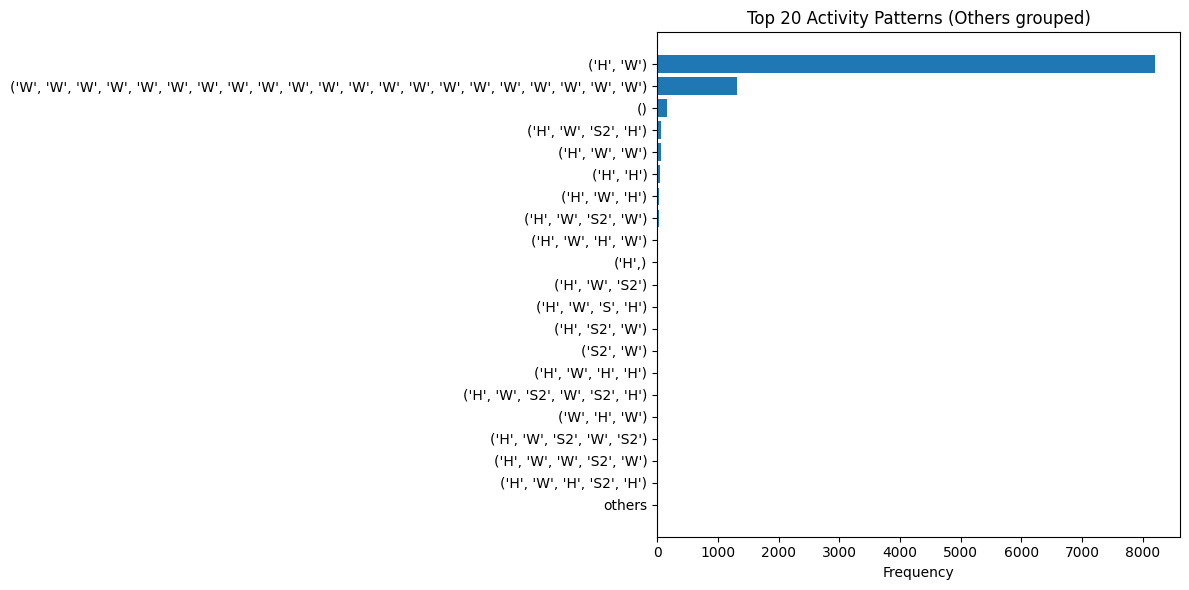

In [93]:
top_k = 20
most_common = pattern_counts.most_common(top_k)
top_patterns = dict(most_common)

# 「その他」をまとめる
other_count = sum(count for pattern, count in pattern_counts.items() if pattern not in top_patterns)

# 可視化用のデータ作成
labels = [str(p) for p in top_patterns.keys()] + ["others"]
counts = list(top_patterns.values()) + [other_count]

plt.figure(figsize=(12, 6))
plt.barh(labels, counts) # , grid=True, color='skyblue')
print(labels)
print(counts)
plt.xlabel("Frequency")
plt.title(f"Top {top_k} Activity Patterns (Others grouped)")
plt.gca().invert_yaxis()  # 上に頻度の多いものを持ってくる
plt.tight_layout()
plt.show()




In [160]:
# toy activity dataを使った学習実験用

import torch
import pandas as pd
import numpy as np
from torch import nn
from network import Network
from tokenization import Tokenization
# from ActFormer.RoutesFormer.toyact_src.actformer_toyact import Actformer
from actformer import Actformer
# from utils.logger import logger
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, random_split, DataLoader, Subset
import torch.nn.functional as F
import os
os.environ["WANDB_MODE"] = "offline"
import wandb
import json
import pickle
import sys
import networkx as nx
import datetime

nrow = 5000 # 1000行だけ読み込む
wandb.init(
    # set the wandb project where this run will be logged
    project="ActFormer0411",

    # track hyperparameters and run metadata
    config={
    "nrow": nrow,
    "learning_rate": 0.001,
    "architecture": "Normal",
    "dataset": "0928_day_night",
    "epochs": 200,
    "batch_size": 256,
    "l_max" : 21,
    "B_en" : 6,
    "B_de" : 6,
    "head_num" : 4,
    "d_ie_time" : 32, # dimension of token embedding
    "d_ie_loc" : 32, # dimension of token embedding
    "d_ie_act" : 32, # dimension of token embedding
    "d_fe" : 4, # dimension of feature embedding
    "d_ff" : 32, # dimension of feed forward layer
    "eos_weight" : 3.0,
    "stay_weight" : 1,
    "mask_rate" : 0.1,
    "savefilename": None,
    "alignment_loss_weight": 0.01,
    "identical_penalty_weight": 1,
    }
)

run_id = wandb.run.id  # or use wandb.run.name
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_nrow" + str(nrow))
savefilename = f"ACT_{timestamp}_{run_id}.pth"
# wandb.config.savefilename = savefilename # これで最後のエラー出ないはず
# wandb.config.update("savefilename", savefilename, allow_val_change=True)
wandb.config.update({"savefilename": savefilename}, allow_val_change=True)

base_path = '/Users/matsunagatakahiro/Desktop/res2025/ActFormer'

k = 1 # 10分割してるので
df_time_arr = pd.read_csv(os.path.join(base_path, f'tokyoPT2019/actformer_input/time_cleaned_{k}.csv'), index_col = 0, nrows=nrow)
df_loc_arr = pd.read_csv(os.path.join(base_path, f'tokyoPT2019/actformer_input/loc_cleaned_{k}.csv'), index_col = 0, nrows=nrow) 
df_act_traj = pd.read_csv(os.path.join(base_path, f'tokyoPT2019/actformer_input/act_cleaned_{k}.csv'), index_col = 0, nrows=nrow) 
df_indivi = pd.read_csv(os.path.join(base_path, f'tokyoPT2019/actformer_input/indivi_cleaned_{k}.csv'), index_col = False, nrows=nrow)
df_indivi.drop(columns=['household_size', 'age', 'work_start_am_pm', 'work_start_hour', 'work_start_minute', 'household_income', 'survey_month', 'survey_day'], inplace=True)
print(df_indivi.columns)
print('nrows', df_indivi.shape[0])

loc_columns = df_loc_arr.columns.tolist() 
time_columns = df_time_arr.columns.tolist() 
act_columns = df_act_traj.columns.tolist() 
indivi_columns = df_indivi.columns.tolist() 

time_sequence = pd.unique(df_time_arr[time_columns].values.ravel())
loc_sequence = pd.unique(df_loc_arr[loc_columns].values.ravel())
act_sequence = pd.unique(df_act_traj[act_columns].values.ravel())

context_sequences_dict = {
    col : pd.unique(df_indivi[col].values.ravel()) 
    for col in df_indivi.columns[1:]
}

time_fromindivi_sequence = pd.unique(df_indivi['work_start_time'].values.ravel())
loc_fromindivi_sequence = pd.unique(df_indivi[['home_city', 'workplace_city']].values.ravel())

time_sequence = [int(float(time)) for time in time_sequence if pd.notna(time) and str(time) != '99.0']
loc_sequence = [int(float(loc)) for loc in loc_sequence if pd.notna(loc) and str(loc) != '99.0']
act_sequence = [int(float(act)) for act in act_sequence if pd.notna(act) and str(act) != '99.0']
context_sequences_dict = {
    col : [int(float(val)) for val in context_sequences_dict[col] if pd.notna(val) and str(val) != '99.0']
    for col in df_indivi.columns[1:]
}
time_fromindivi_sequence = [int(float(time)) for time in time_fromindivi_sequence if pd.notna(time) and str(time) != '99.0']
loc_fromindivi_sequence = [int(float(loc)) for loc in loc_fromindivi_sequence if pd.notna(loc) and str(loc) != '99.0']
total_time_sequence = set(time_sequence + time_fromindivi_sequence)
total_loc_sequence = set(loc_sequence + loc_fromindivi_sequence)

unique_time = sorted(set(total_time_sequence))
unique_locs = sorted(set(total_loc_sequence))
unique_acts = sorted(set(act_sequence))
num_indivi = len(df_indivi.columns) - 1 # 1列目は個人IDなので除外
unique_contexts_dict = {
    col: sorted(set(context_sequences_dict[col]))
    for col in df_indivi.columns[1:]
}

context_categori_nums = [len(df_indivi[col].unique()) for col in df_indivi.columns[1:]] # 1列目は個人IDなので除外
print('<<<<<context_categori_nums>>>>>', context_categori_nums)
context_categori_nums_dict = {df_indivi.columns[i+1]: context_categori_nums[i] + 1 for i in range(len(context_categori_nums))}
context_categori_nums_dict['work_start_time'] = len(unique_time)
context_categori_nums_dict['home_city'] = len(unique_locs)
context_categori_nums_dict['workplace_city'] = len(unique_locs)


#### 各トークンのvocab_size ####
context_vocab_sizes = context_categori_nums_dict.values()
print('ccontext_vocab_sizes', context_vocab_sizes)

# map(tokenid - index)
time2id = {time: i for i, time in enumerate(unique_time)}  # mapping辞書作成


Index(['individual_id', 'home_city', 'own_car', 'own_bike', 'own_motorbike',
       'gender', 'relation_to_head', 'employment_status', 'occupation',
       'driving_license', 'free_use_car', 'mobility_difficulty',
       'workplace_city', 'fixed_work_hours', 'remote_work', 'work_start_time'],
      dtype='object')
nrows 5000
<<<<<context_categori_nums>>>>> [95, 7, 10, 6, 2, 12, 11, 5, 4, 5, 5, 212, 4, 4, 40]
ccontext_vocab_sizes dict_values([246, 8, 11, 7, 3, 13, 12, 6, 5, 6, 6, 246, 5, 5, 48])


In [161]:
print('time2id', time2id)

time2id {0: 0, 100: 1, 200: 2, 230: 3, 300: 4, 330: 5, 400: 6, 430: 7, 500: 8, 530: 9, 600: 10, 630: 11, 700: 12, 730: 13, 800: 14, 830: 15, 900: 16, 930: 17, 1000: 18, 1030: 19, 1100: 20, 1130: 21, 1200: 22, 1230: 23, 1300: 24, 1330: 25, 1400: 26, 1430: 27, 1500: 28, 1530: 29, 1600: 30, 1630: 31, 1700: 32, 1730: 33, 1800: 34, 1830: 35, 1900: 36, 1930: 37, 2000: 38, 2030: 39, 2100: 40, 2130: 41, 2200: 42, 2230: 43, 2300: 44, 2330: 45, 2400: 46, 11300: 47}


Departure Time 12: 7971
Departure Time 0: 1309
Departure Time 11: 411
Departure Time 50: 160
Departure Time 13: 70
Departure Time 5: 27
Departure Time 9: 11
Departure Time 7: 6
Departure Time 10: 6
Departure Time 8: 5
Departure Time 6: 3
Departure Time 15: 2
Departure Time 35: 2
Departure Time 38: 1
14
top_departures dict_keys([12, 0, 11, 50, 13, 5, 9, 7, 10, 8, 6, 15, 35, 38])


ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of labels (15).

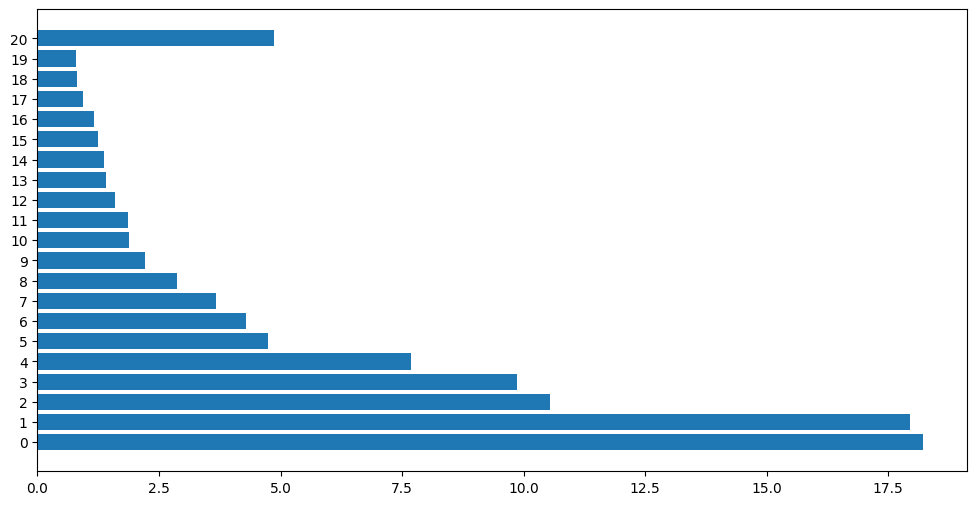

In [162]:
# del sum
df_time = pd.read_csv(os.path.join(basepath, '0411time_inference_result_crossmodalatt11.csv'), index_col=0)

df_res_time_departure = df_time.iloc[:, 1]
# summ = 0s
deptime_counts = Counter(df_res_time_departure)
for deptime, count in deptime_counts.most_common():
    print(f"Departure Time {deptime}: {count}")
    # summ += count
# 上位20個を取得p
# print('summ', summ)
print(len(deptime_counts))
# 上位20個を取得
top_k = 20
most_common =deptime_counts.most_common(top_k)
top_departures = dict(most_common)
# 「その他」をまとめる
other_count = sum(count for departure, count in deptime_counts.items() if departure not in top_departures)
# 可視化用のデータ作成
# labels = [str(d) for d in top_departures.keys()] + ["others"]
# labels = [time2id.get(int(dep), str(dep)) for dep in top_departures.values()] + ["others"]
print('top_departures', top_departures.keys())


# 逆引き辞書を作る：ラベル → ID
id_from_time = {v: k for k, v in time2id.items()}


labels = [id_from_time.get(int(dep), str(dep)) for dep in top_departures.keys()] + ["others"]


# Y軸位置として整数インデックスを使う
y_pos = np.arange(len(counts))

plt.figure(figsize=(12, 6))
# 出現割合に変換（%）
total = sum(counts)
counts = [count / total * 100 for count in counts]
plt.barh(y_pos, counts)  # 数値インデックスを使う
plt.yticks(y_pos, labels)  # ラベルは別途設定
plt.xlabel("Frequency")
# plt.title(f"Top {top_k} Departure Times (Others grouped)")
plt.gca().invert_yaxis()  # 頻度の多いものを上に
plt.tight_layout()
plt.show()


'''

print(labels)
counts = list(top_departures.values()) + [other_count]
plt.figure(figsize=(12, 6))
plt.barh(labels, counts) # , grid=True, color='skyblue')
print(counts)
plt.xlabel("Frequency")
# plt.title(f"Top {top_k} Departure Patterns (Others grouped)")
plt.gca().invert_yaxis()  # 上に頻度の多いものを持ってくる
plt.tight_layout()
plt.show()
'''

最初の位置が自宅である割合

In [106]:
df_loc_infered = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0411loc_inference_result_crossmodalatt11.csv')
df_context = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0411context_inference_result_crossmodalatt11.csv')

# initial location
initloc = df_loc_infered.iloc[:, 2]
homeloc = df_context.iloc[:, 1]
print(initloc)
print(homeloc)
print(type(initloc))
print(homeloc.shape)

0       116
1       258
2       104
3       184
4       254
       ... 
9979    268
9980      0
9981      0
9982      0
9983      0
Name: 1, Length: 9984, dtype: int64
0       116
1       258
2       127
3       127
4       254
       ... 
9979    263
9980    999
9981    999
9982    999
9983    999
Name: 0, Length: 9984, dtype: int64
<class 'pandas.core.series.Series'>
(9984,)


In [107]:
# initloc と homeloc の値を比較 一致するかどうか
# 0: 一致する 1: 一致しない
valid_len_homeloc = homeloc[homeloc != 999].shape[0] # 有効なデータの数
valid_homeloc_idx = homeloc[homeloc != 999].index # 有効なデータのインデックス
print(len(valid_homeloc_idx))
valid_len_initloc = initloc[initloc != 0].shape[0]
print(valid_len_homeloc, valid_len_initloc)

identical_count = 0
for id in valid_homeloc_idx:
    if initloc[id] == homeloc[id]:
        identical_count += 1
print(identical_count)
print('最初の位置=自宅位置の正答率：', identical_count / valid_len_homeloc)

8675
8675 8656
5771
最初の位置=自宅位置の正答率： 0.6652449567723343


In [108]:
# workの位置の正答率
workloc = df_context.iloc[:, -4]
# みんな2番目の活動場所が仕事場なので：
identical_count_work = 0
second_loc = df_loc_infered.iloc[:, 3]
for id in valid_homeloc_idx:
    if second_loc[id] == workloc[id]:
        identical_count_work += 1
print(identical_count_work)
print('仕事の位置の正答率：', identical_count_work / valid_len_homeloc)

5049
仕事の位置の正答率： 0.5820172910662824


In [99]:
# 仕事終わりの時間分布
import sys
df_time_infered  = pd.read_csv('/Users/matsunagatakahiro/Desktop/res2025/ActFormer/RoutesFormer/output/0411time_inference_result_crossmodalatt01.csv')
df_time_start = df_time_infered.iloc[:, 2]
df_time_workend = df_time_infered.iloc[:, 3]
# print(df_time_start)
# print(df_time_workend)
worktime = df_time_workend - df_time_start
# print(worktime)
worktime_counts = Counter(worktime)
for worktime, count in worktime_counts.most_common():
    print(f"Work Time {worktime}: {count}")
# 上位20個を取得
print(len(worktime_counts))
# 上位20個を取得


Work Time 0: 4147
Work Time 1: 2610
Work Time 2: 1095
Work Time 3: 529
Work Time 4: 269
Work Time 5: 193
Work Time 6: 114
Work Time 14: 97
Work Time 7: 93
Work Time 23: 78
Work Time 24: 67
Work Time 11: 66
Work Time 9: 65
Work Time 12: 63
Work Time 13: 60
Work Time 10: 59
Work Time 8: 56
Work Time 15: 46
Work Time 16: 38
Work Time 25: 28
Work Time 17: 27
Work Time -1: 24
Work Time 26: 22
Work Time 28: 16
Work Time 27: 16
Work Time 18: 15
Work Time 29: 12
Work Time 20: 12
Work Time 22: 11
Work Time 30: 10
Work Time 19: 8
Work Time 21: 8
Work Time 31: 8
Work Time 33: 6
Work Time 32: 5
Work Time 35: 3
Work Time 34: 2
Work Time 37: 2
Work Time 39: 1
Work Time 42: 1
Work Time 43: 1
Work Time 36: 1
42


In [ ]:
# contextで性別が女性の場合
